In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

path = '/content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/'

Mounted at /content/gdrive/


In [2]:
!pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 10.2 MB/s eta 0:00:00


In [3]:
# Load dataset
!pip install roboflow


%cd '/content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/'

from roboflow import Roboflow
rf = Roboflow(api_key="oLBG3uS81J9OATWSfNxg")
project = rf.workspace("koo-a3lwf").project("food-plastic_bottle-label-tumblr")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0

/content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to food+plastic_bottle+label+tumblr-1 in yolov8:: 100%|██████████| 8270/8270 [01:10<00:00, 117.58it/s]


In [4]:
from ultralytics import YOLO
import cv2
print(dataset.location)
# Load a model
model = YOLO("yolov8n.pt")  # build a new model from scratch
results=model.train(data=path+"food+plastic_bottle+label+tumblr-1/data.yaml", epochs=50, project=path, exist_ok=True, verbose=True)  # train the model

/content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/food+plastic_bottle+label+tumblr-1


100%|██████████| 6.23M/6.23M [00:00<00:00, 117MB/s]
New https://pypi.org/project/ultralytics/8.1.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/food+plastic_bottle+label+tumblr-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/, name=None, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, s

In [5]:
import os
# 디렉토리 내의 모든 파일 목록을 반환하는 함수
def list_files(directory, extensions=None):
    file_list = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if extensions is None or file.endswith(extensions):
                file_list.append(os.path.join(root, file))
    return file_list


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/samples/food_1.jpg: 480x640 1 Entreeplate, 1 LargeBowl, 1 cup, 1 fork, 19.0ms
Speed: 3.9ms preprocess, 19.0ms inference, 3.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/predict


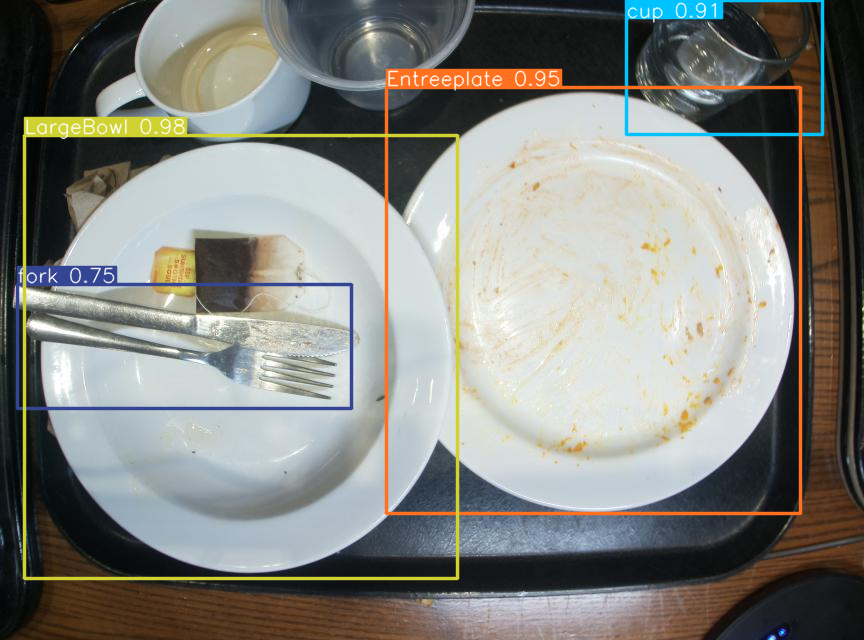


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/samples/food_2.jpg: 480x640 1 BoullionSpoon, 2 Chickens, 1 Entreeplate, 1 EvilBowl, 1 SaladBowl, 1 SoupBowl, 1 fork, 1 knife, 1 spoon, 11.3ms
Speed: 3.3ms preprocess, 11.3ms inference, 2.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/predict


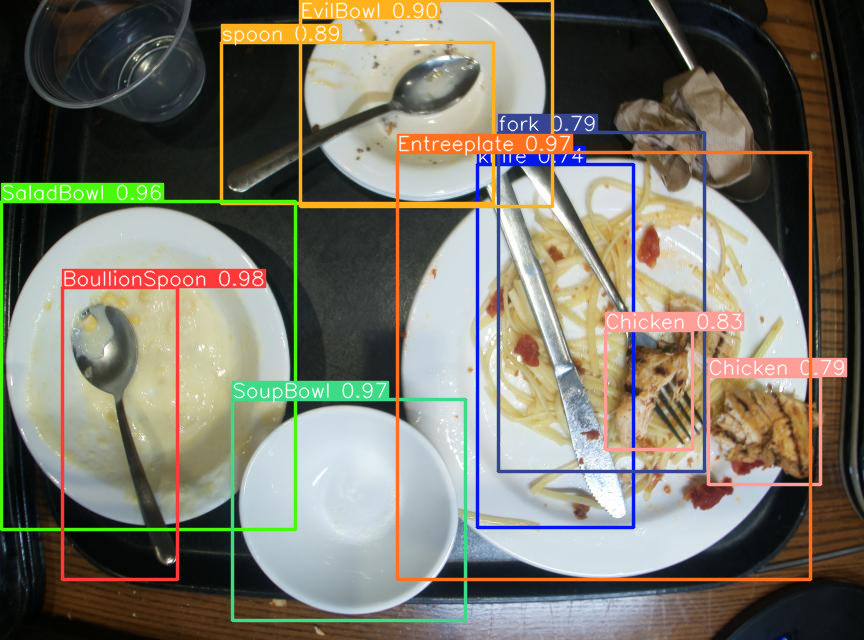


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/samples/food_3.jpg: 480x640 1 Entreeplate, 1 SaladBowl, 1 fork, 1 knife, 1 spoon, 12.1ms
Speed: 3.4ms preprocess, 12.1ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/predict


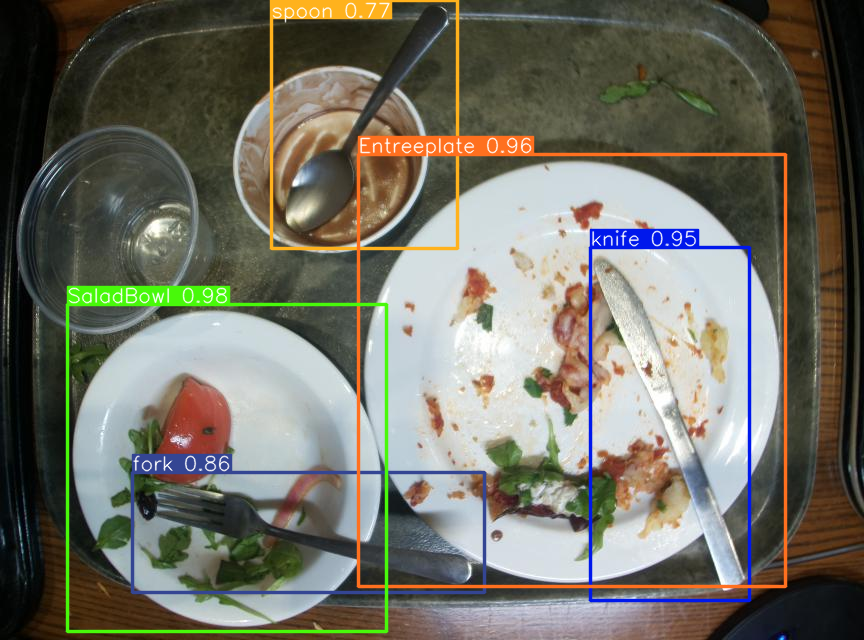


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/samples/chicken.jpeg: 384x640 1 grilled chicken breast, 15.0ms
Speed: 2.9ms preprocess, 15.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/predict


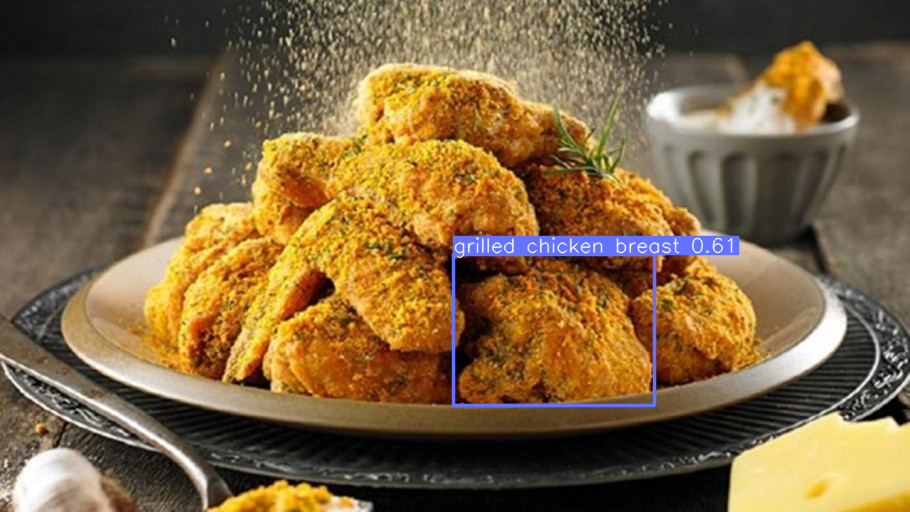


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/samples/bottle_with_label_1.jpeg: 640x480 1 label, 12.6ms
Speed: 3.3ms preprocess, 12.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/predict


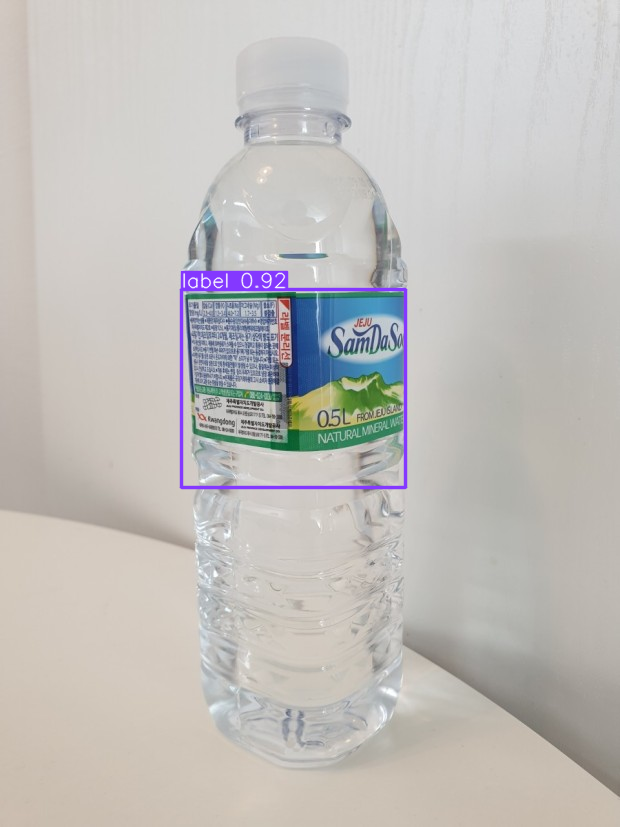


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/samples/bottle_with_label_4.jpeg: 640x352 1 plastic-bottles, 12.8ms
Speed: 6.4ms preprocess, 12.8ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 352)
Results saved to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/predict


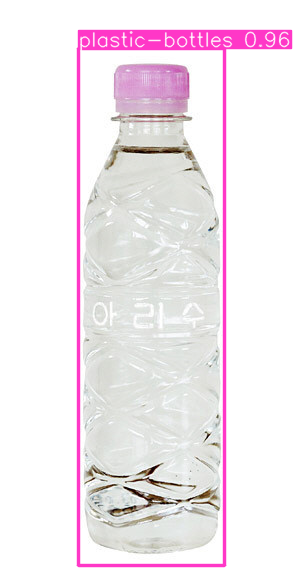


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/samples/bottle_with_label_2.jpg: 640x640 1 label, 17.9ms
Speed: 3.7ms preprocess, 17.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/predict


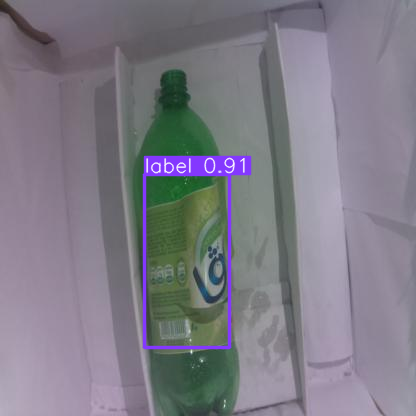


image 1/1 /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/samples/tumblr.jpg: 640x480 1 Tumblr, 12.5ms
Speed: 3.7ms preprocess, 12.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /content/gdrive/MyDrive/Colab Notebooks/Solution_Challenge/predict


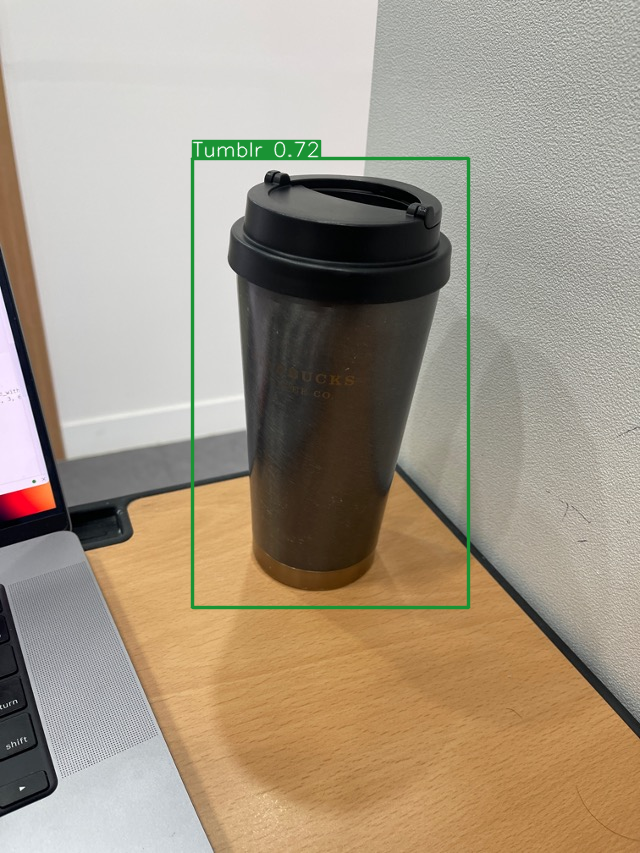

In [10]:
from google.colab.patches import cv2_imshow
import cv2
directory = path + "/samples/"

image_files = list_files(directory, extensions=('.jpg', '.jpeg', '.png'))

for image_file in image_files:
    result = model(image_file, conf=0.5, save=True)
    cv2_imshow(result[0].plot())
